In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection    import train_test_split
from sklearn.ensemble           import RandomForestClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import (accuracy_score, balanced_accuracy_score, average_precision_score, brier_score_loss,
                                         f1_score, log_loss, precision_score, recall_score, roc_auc_score, confusion_matrix)
from sklearn.metrics            import classification_report, confusion_matrix

from functions.bank_clean       import get_bank_additional
from functions.mushroom_clean   import get_mushrooms

from _base import SyntheticStratifiedKFold

import warnings
warnings.filterwarnings("ignore")

### Import, Clean, and Summarize Data

In [4]:
# get data
#X, y, df = get_bank_additional()
X, y, df = get_mushrooms(pca_components = 10, minority_frac = 0.8)

# create test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) 

# gather details
total_columns 	= df.shape[1]
train_rows 		= X_train.shape[0]
test_rows 		= X_test.shape[0]
classes 		= pd.unique(y)

# summarize
print('Total Columns:  %d' % total_columns )
print('Train Rows:  %d' % train_rows )
print('Test  Rows:  %d' % test_rows )
print('N Classes:  %d' % len(classes))

print('\nTrain Classes: %s' % pd.unique(y))
for c in classes:
	total = len(y_train[y_train == c])
	ratio = (total / float(len(y_train))) * 100
	print(' - Class %s: %d (%.2f%%)' % (str(c), total, ratio))

print('\nTest Classes: %s' % pd.unique(y))
for c in classes:
	total = len(y_test[y_test == c])
	ratio = (total / float(len(y_test))) * 100
	print(' - Class %s: %d (%.2f%%)' % (str(c), total, ratio))

Total Columns:  11
Train Rows:  3758
Test  Rows:  1253
N Classes:  2

Train Classes: [0 1]
 - Class 0: 3151 (83.85%)
 - Class 1: 607 (16.15%)

Test Classes: [0 1]
 - Class 0: 1057 (84.36%)
 - Class 1: 196 (15.64%)


### Perform Methodology and Score

-- Confusion Matrix -----------------------------------


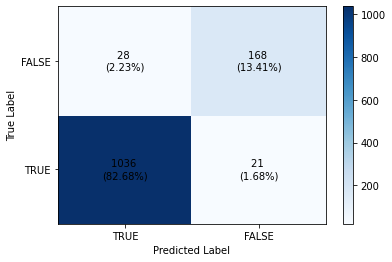

-- Classification Report ------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1057
           1       0.89      0.86      0.87       196

    accuracy                           0.96      1253
   macro avg       0.93      0.92      0.92      1253
weighted avg       0.96      0.96      0.96      1253

-- Scores ---------------------------------------------
accuracy_score            : 0.9609
balanced_accuracy_score   : 0.9186
precision_score           : 0.8889
average_precision_score   : 0.7843
recall_score              : 0.8571
f1_score                  : 0.8727
roc_auc_score             : 0.9186
log_loss                  : 1.3507
brier_score_loss          : 0.0391
-------------------------------------------------------


In [5]:
# Initialize method
sskfold = SyntheticStratifiedKFold(
          model_type = LogisticRegression()
        , scoring = accuracy_score
        , folds = 5
        , shuffle = True
        , random_state = 1
    )

# Fit method
sskfold.fit(X_train, y_train)

# Predict using method
preds = sskfold.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Create the heatmap using the data and labels
heatmap = ax.pcolor(cm, cmap=plt.cm.Blues)

# Format the ticks on the x and y axes
ax.set_xticks(np.arange(cm.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(cm.shape[1]) + 0.5, minor=False)

# Set the labels for the x and y axes
ax.set_xticklabels(['TRUE', 'FALSE'], minor=False)
ax.set_yticklabels(['TRUE', 'FALSE'], minor=False)

# Add a title to the plot
print("-- Confusion Matrix -----------------------------------")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add a colorbar to the plot
fig.colorbar(heatmap)

# Add the numbers to each box in the confusion matrix
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        ax.text(x + 0.5, y + 0.5, '{0} \n({1:.2f}%)'.format(cm[y, x], cm[y, x] / cm.sum() * 100),
                horizontalalignment='center',
                verticalalignment='center',
                )

# Show the plot
plt.show()

# Classification Report
print("-- Classification Report ------------------------------")
print(classification_report(y_test, preds))


# Print Scores
metric_list = [accuracy_score, balanced_accuracy_score, precision_score, average_precision_score, 
                recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss]

print("-- Scores ---------------------------------------------")
for score in metric_list:
    print(str(score).split(" ")[1].ljust(25), ": {0:.4f}".format(score(y_test, preds)))
print("-------------------------------------------------------")
